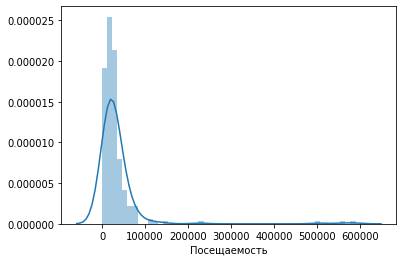

In [81]:
from reportlab.pdfgen import canvas
from reportlab.lib import pagesizes
from reportlab.pdfbase import pdfmetrics
from reportlab.pdfbase.ttfonts import TTFont
from reportlab.lib.utils import ImageReader
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

r = requests.get("https://video.ittensive.com/python-advanced/data-7361-2019-11-28.utf.json")
data = pd.DataFrame(json.loads(r.content),
                   columns = ["NumOfVisitors", "CommonName"]).fillna(value=0)
sns.distplot(data["NumOfVisitors"]).set(xlabel="Посещаемость")
plt.savefig('libraries.png')

pdfmetrics.registerFont(TTFont('Trebuchet', 'Trebuchet.ttf'))
PDF = canvas.Canvas("libraries.pdf", pagesize=pagesizes.A4)
PDF.setFont("Trebuchet", 48)
PDF.drawString(100, 650, "Библиотеки Москвы")
PDF.setFont("Trebuchet", 13)
PDF.drawString(550, 820, "2")
PDF.drawImage(ImageReader("libraries.png"), 100, 300)
PDF.save()